# E04 - Controle Estatístico de Processo

E04 - Análise da Planta de Tratamento de Água pelo Controle Estatístico de Processo

## Pacotes Importantes

In [1]:
install.packages("googlesheets4")

Installing package into 'C:/Users/lucas/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'googlesheets4' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lucas\AppData\Local\Temp\RtmpmYuqTx\downloaded_packages


## Análise Exploratória

Analisar os dados apresentados

In [2]:
library(googlesheets4)
library(qcc)

Warning message:
"package 'googlesheets4' was built under R version 4.3.3"
Warning message:
"package 'qcc' was built under R version 4.3.3"
Package 'qcc' version 2.7

Type 'citation("qcc")' for citing this R package in publications.



In [3]:
url_planilha <- "https://docs.google.com/spreadsheets/d/1R0C885chVDklaK92j19qcCUZHnGzNtmLs7sYlQOmtd4/edit?gid=0#gid=0"
gs4_deauth()
# respostas_formulario <- read_sheet(url_planilha)

In [4]:
dados_vazao <- read_sheet(url_planilha, sheet = 2)
dplyr::glimpse(dados_vazao)

✔ Reading from Controle Estatístico de Processos - Variáveis.

✔ Range ''vazao''.



Rows: 4
Columns: 3
$ `V (ml)`    <dbl> 200, 200, 210, 212
$ `Tempo (s)` <dbl> 12.42, 11.80, 12.97, 10.40
$ `Q (L/min)` <dbl> 0.9661836, 1.0169492, 0.9714726, 1.2230769


In [5]:
dados_niveis <- read_sheet(url_planilha, sheet = 3)
dplyr::glimpse(dados_niveis)

✔ Reading from Controle Estatístico de Processos - Variáveis.

✔ Range ''nivel''.



Rows: 4
Columns: 3
$ A <dbl> 1, 1, 0, 1
$ B <dbl> 1, 1, 1, 1
$ C <dbl> 1, 0, 1, 1


In [6]:
temp_quente <- read_sheet(url_planilha, sheet = 4)
dplyr::glimpse(temp_quente)

✔ Reading from Controle Estatístico de Processos - Variáveis.

✔ Range ''tempQ''.



Rows: 54
Columns: 3
$ `Temp. Quente (1)` <dbl> 40.8, 39.2, 38.2, 39.1, 41.3, 41.1, 40.3, 39.1, 38.…
$ `Temp. Quente (2)` <dbl> 40.2, 38.8, 38.2, 39.6, 41.5, 40.8, 39.9, 38.7, 38.…
$ `Temp. Quente (3)` <dbl> 39.6, 38.5, 38.6, 40.3, 41.7, 40.6, 39.5, 38.5, 38.…


In [7]:
temp_c <- read_sheet(url_planilha, sheet = 5)
dplyr::glimpse(temp_c)

✔ Reading from Controle Estatístico de Processos - Variáveis.

✔ Range ''tempC''.



Rows: 54
Columns: 3
$ `Temp. C (1)` <dbl> 31.0, 30.0, 30.0, 31.0, 31.0, 30.0, 30.0, 30.0, 30.0, 30…
$ `Temp. C (2)` <dbl> 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30…
$ `Temp. C (3)` <dbl> 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.5, 30.0, 30…


In [8]:
temp_frio <- read_sheet(url_planilha, sheet = 6)
dplyr::glimpse(temp_frio)

✔ Reading from Controle Estatístico de Processos - Variáveis.

✔ Range ''tempF''.



Rows: 54
Columns: 3
$ `Temp. Frio (1)` <dbl> 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5,…
$ `Temp. Frio (2)` <dbl> 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5,…
$ `Temp. Frio (3)` <dbl> 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5,…


## Soluções Comentadas

### Questão f

Ao utilizar o qcc, por padrão, a função qcc() detecta somente pontos fora dos limites de controle de 3 desvios-padrão (3σ), ou seja, um único ponto fora dos limites superiores ou inferiores já é considerado indicativo de uma causa especial.

Os critérios clássicos da Western Electric, conforme apresentados no enunciado do exercício, são:

1 ponto fora dos limites de 3σ;

2 de 3 pontos consecutivos fora dos limites de 2σ no mesmo lado da linha central;

4 de 5 pontos consecutivos fora dos limites de 1σ no mesmo lado da linha central;

8 pontos consecutivos no mesmo lado da linha central.

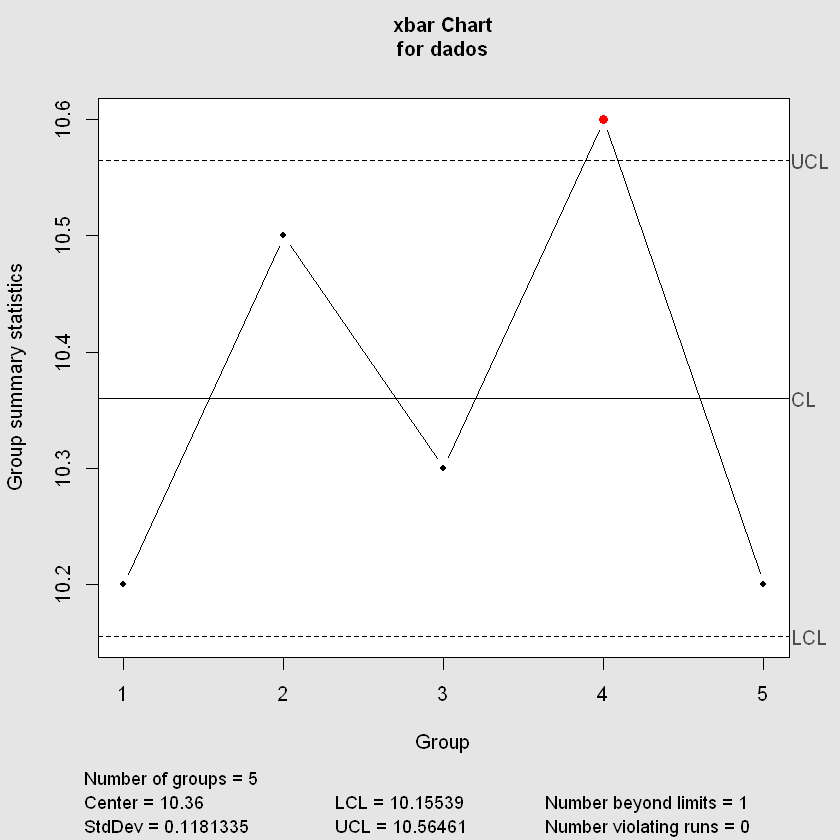

In [9]:
# Dados em 5 subgrupos de tamanho 3
dados <- matrix(c(
  10.1, 10.2, 10.3,
  10.5, 10.4, 10.6,
  10.3, 10.2, 10.4,
  10.6, 10.7, 10.5,
  10.2, 10.1, 10.3
), ncol = 3, byrow = TRUE)

# Gráfico de x̄ e R
# qcc(dados, type = "xbar")
# Gráfico com as regras da Western Electric
g <- qcc(dados, type = "xbar")

# Aplicando regras adicionais
violations <- shewhart.rules(g)

# Destacar os pontos que violam as regras
plot(g)
points(g$center + 3*g$std.dev, col="red", pch=19)

### Questão h

#### Vazão

In [10]:
Q <- c(0.9661836, 1.0169492, 0.9714726, 1.2230769)
media_Q <- mean(Q) 
desvio_Q <- sd(Q)   

media_Q
desvio_Q

[1] 1.044421

[1] 0.1212644

#### Temperatura Quente

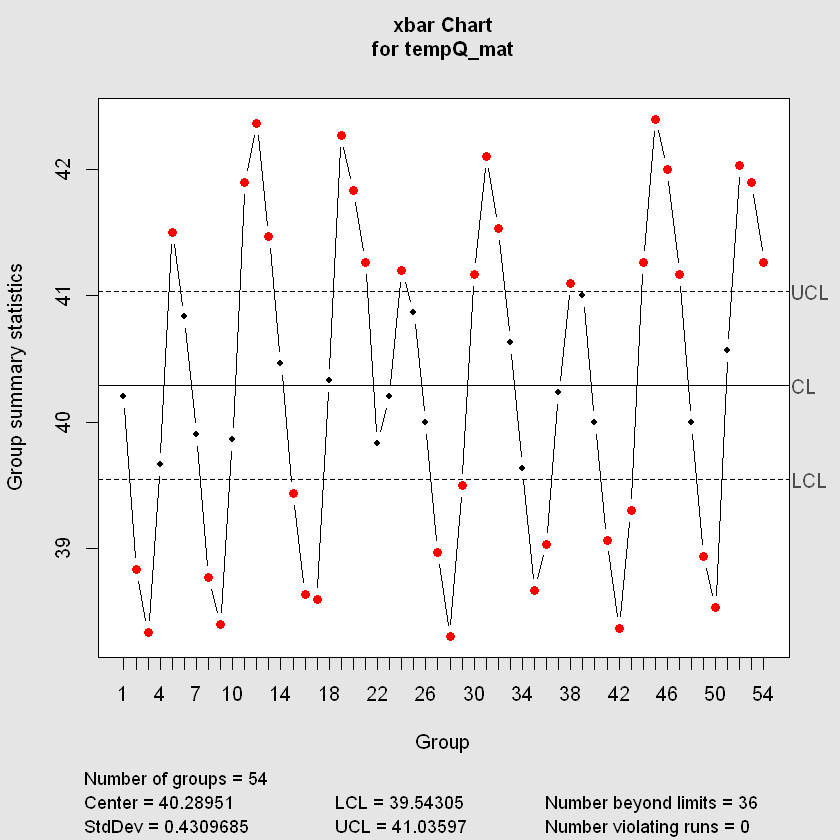

In [11]:
tempQ_mat <- temp_quente  # use seus dados reais aqui
qcc_tempQ <- qcc(tempQ_mat, type = "xbar")

#### Temperatura Saída

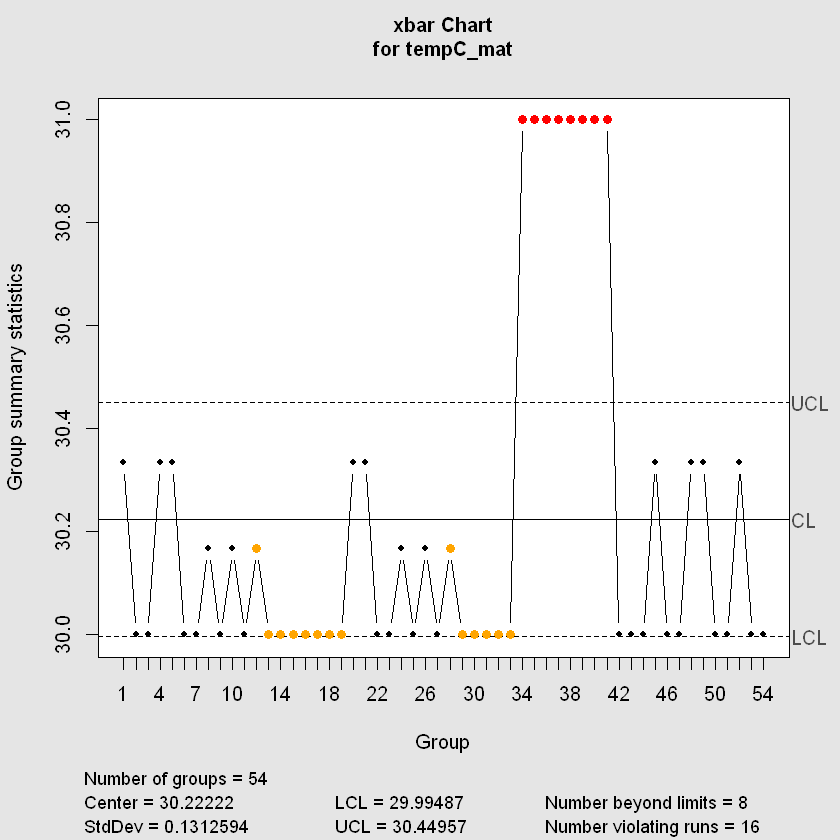

In [12]:
tempC_mat <- temp_c  # use seus dados reais aqui
qcc_tempC <- qcc(tempC_mat, type = "xbar")

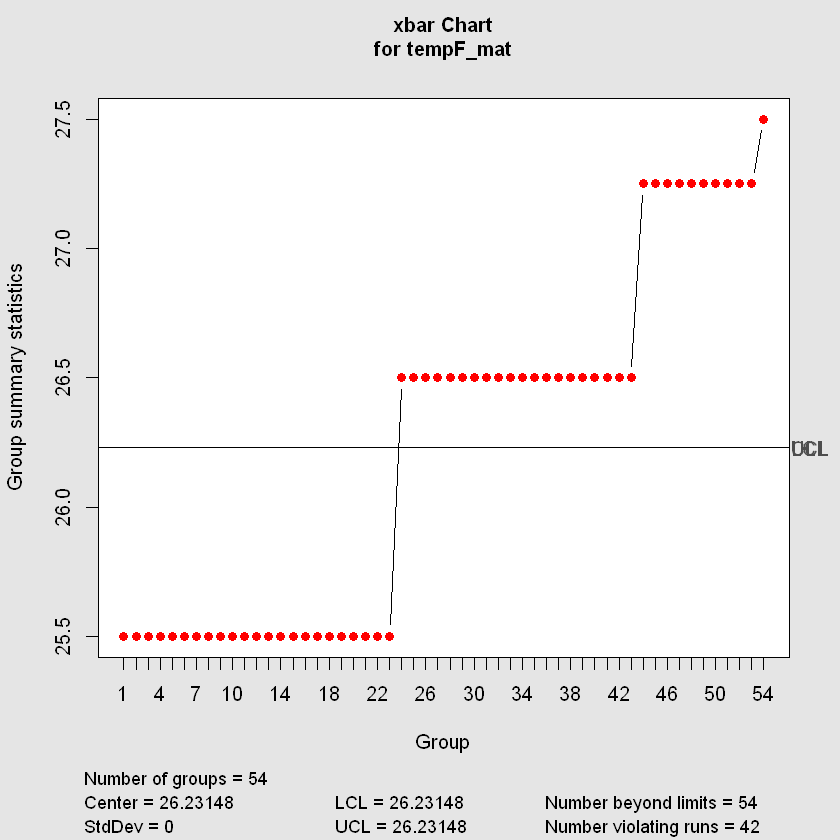

In [13]:
tempF_mat <- temp_frio  # use seus dados reais aqui
qcc_tempF <- qcc(tempF_mat, type = "xbar")

### Questão i

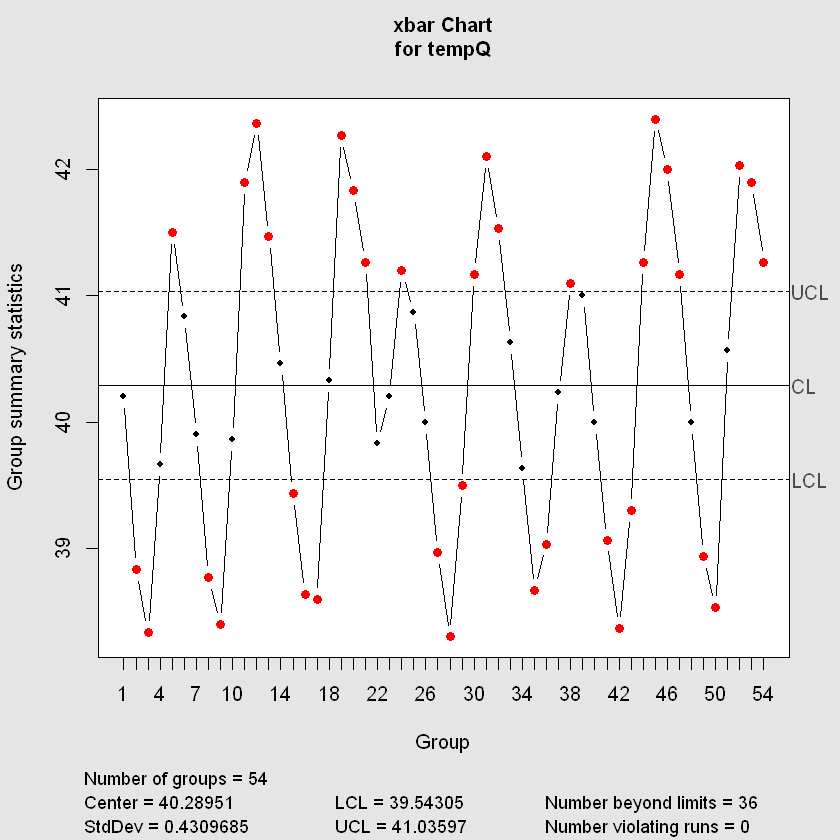

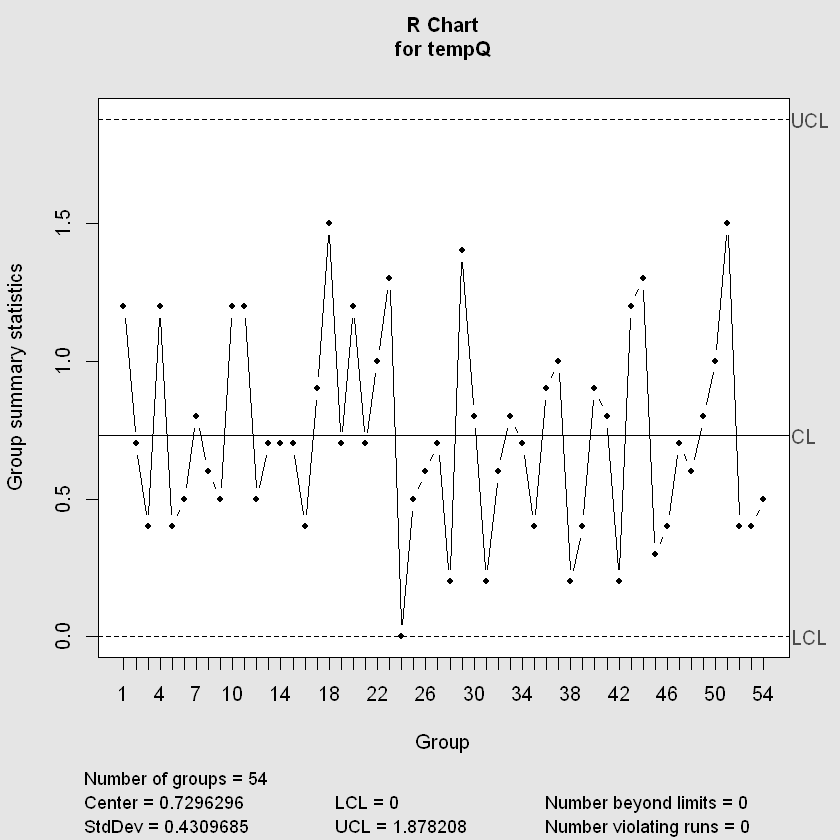

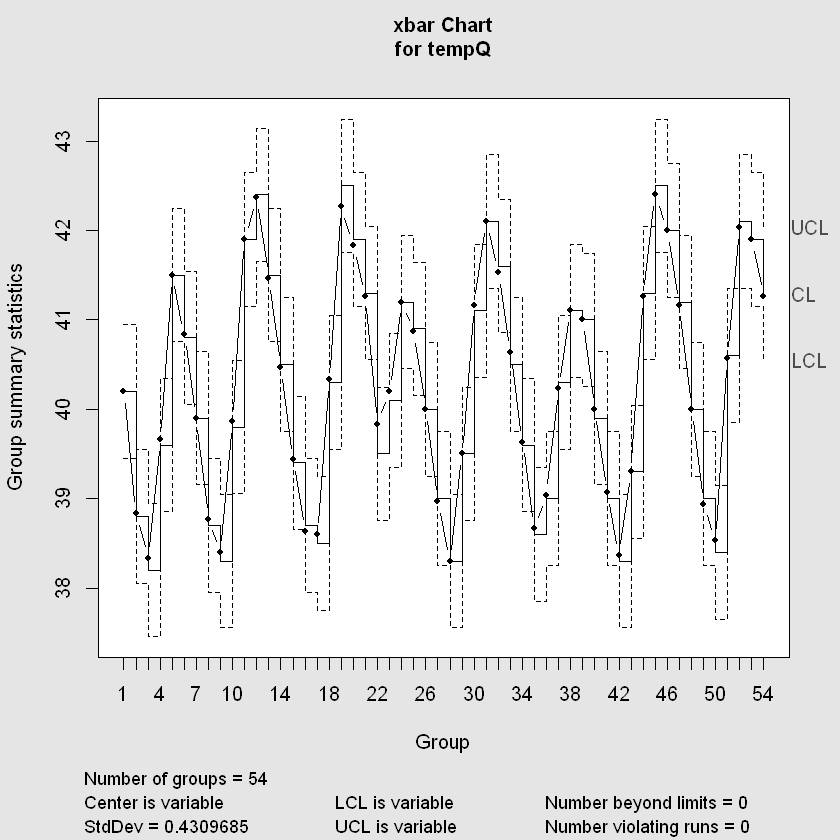

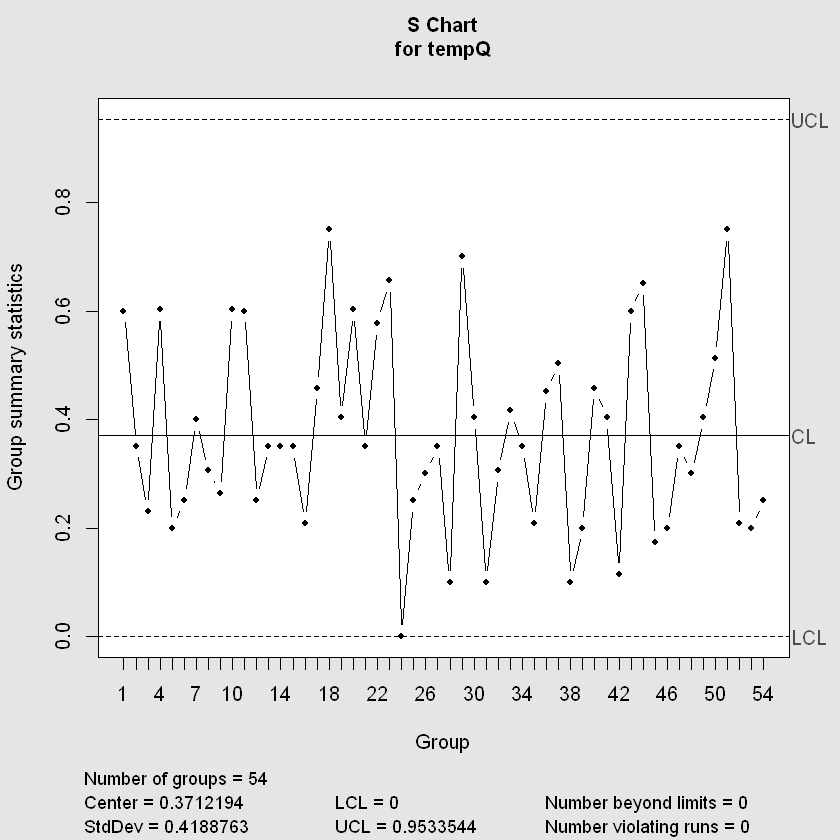

In [14]:
tempQ <- temp_quente # ou use diretamente os vetores

# Gráficos de x̄ e R
qcc_xbar <- qcc(tempQ, type = "xbar")
qcc_range <- qcc(tempQ, type = "R")

# Gráficos de x̃ (mediana) e s
qcc_median <- qcc(tempQ, type = "xbar", center = apply(tempQ, 1, median))
qcc_sd <- qcc(tempQ, type = "S")

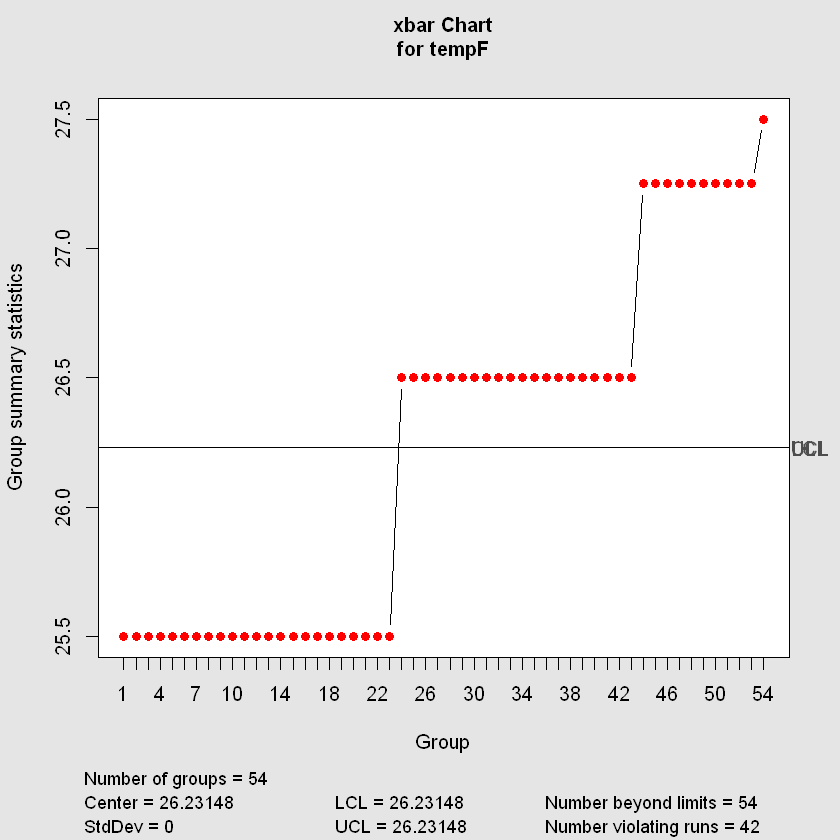

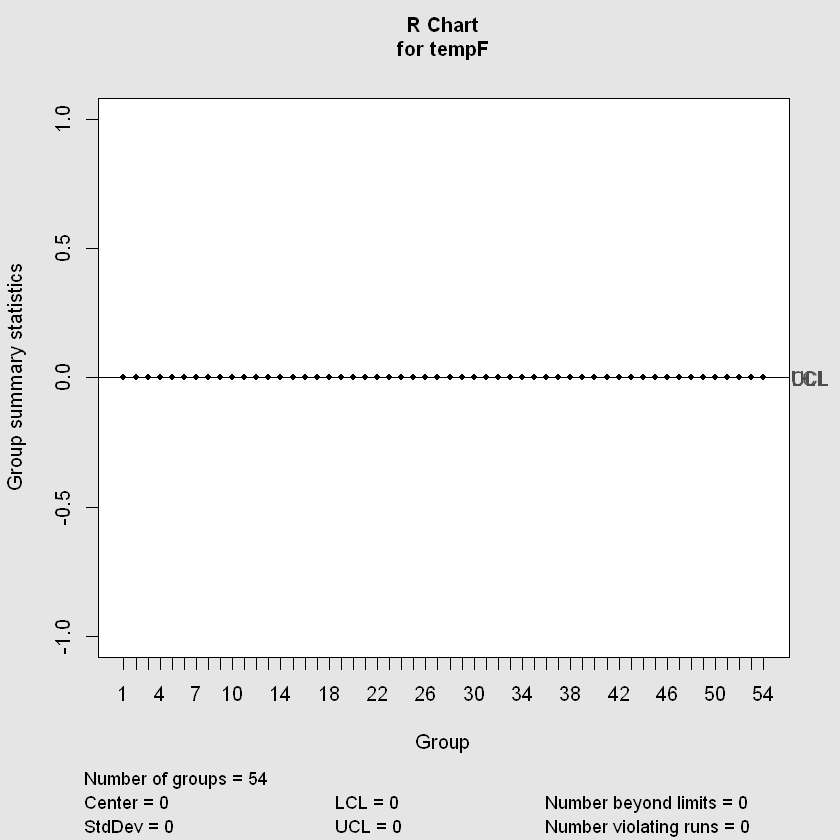

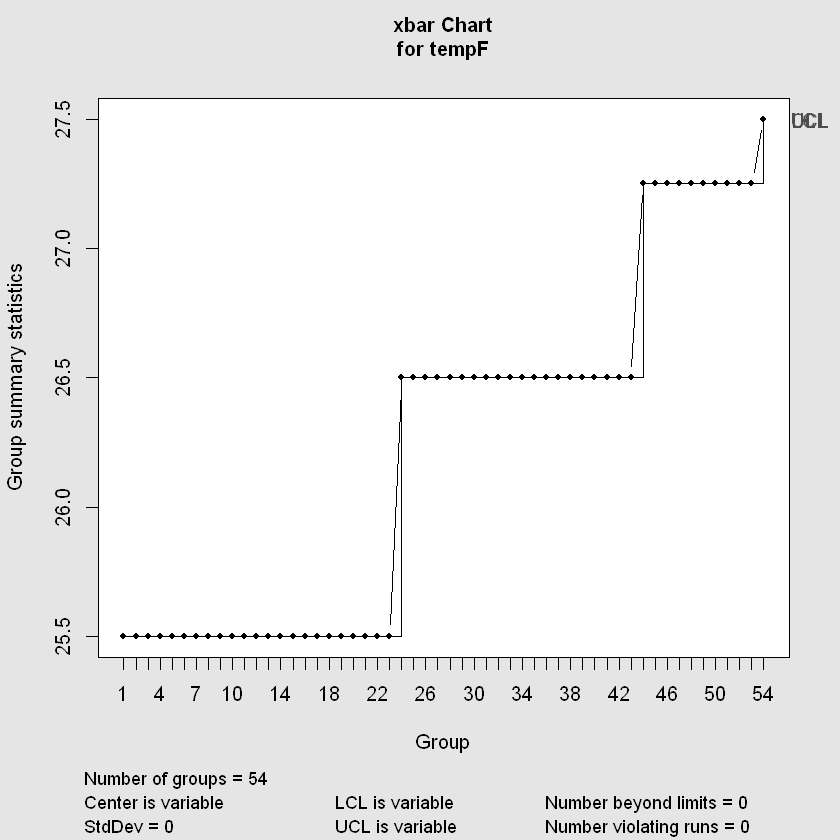

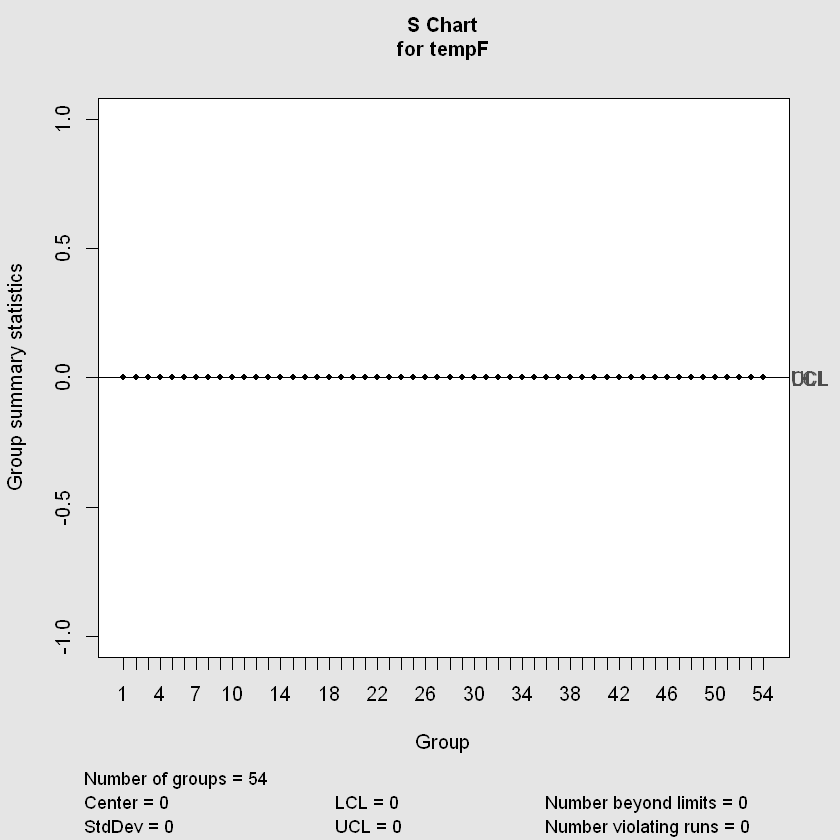

In [15]:
tempF <- temp_frio # ou use diretamente os vetores

# Gráficos de x̄ e R
qcc_xbar <- qcc(tempF, type = "xbar")
qcc_range <- qcc(tempF, type = "R")

# Gráficos de x̃ (mediana) e s
qcc_median <- qcc(tempF, type = "xbar", center = apply(tempF, 1, median))
qcc_sd <- qcc(tempF, type = "S")

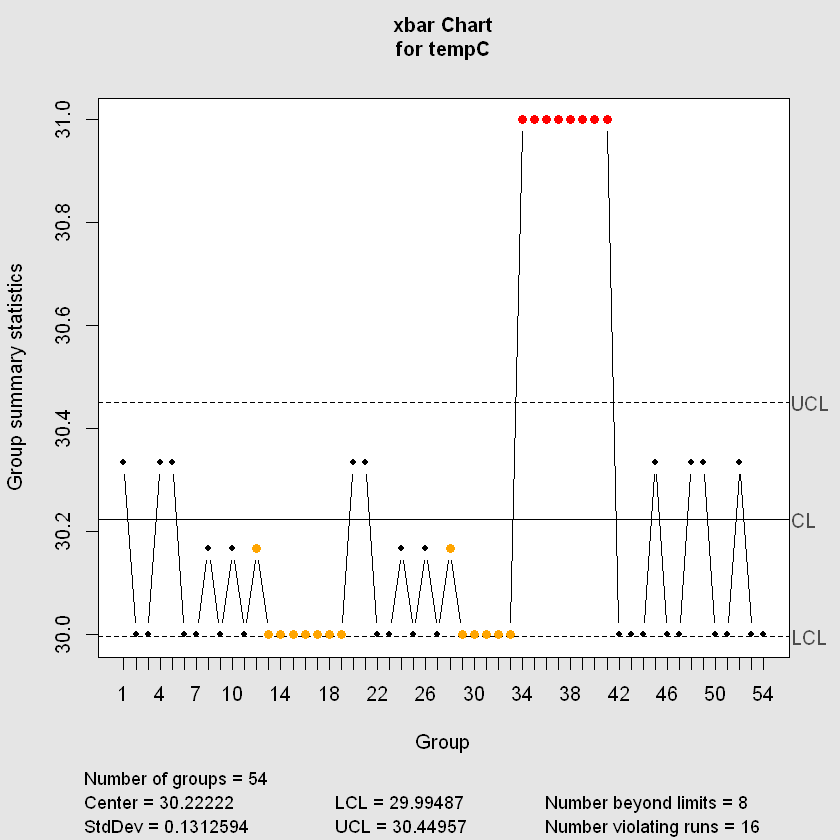

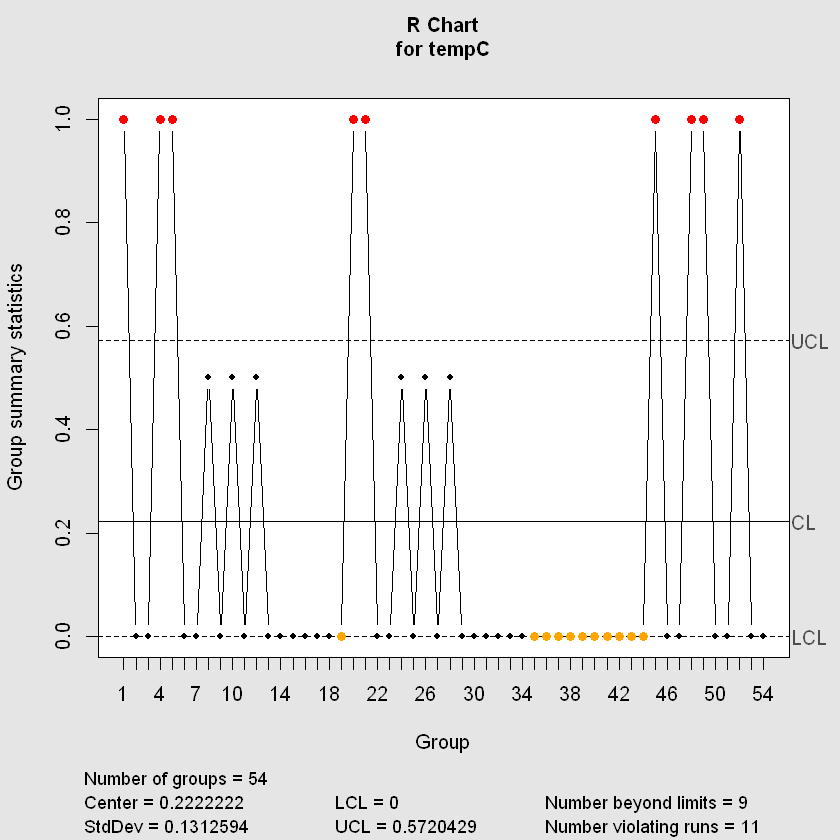

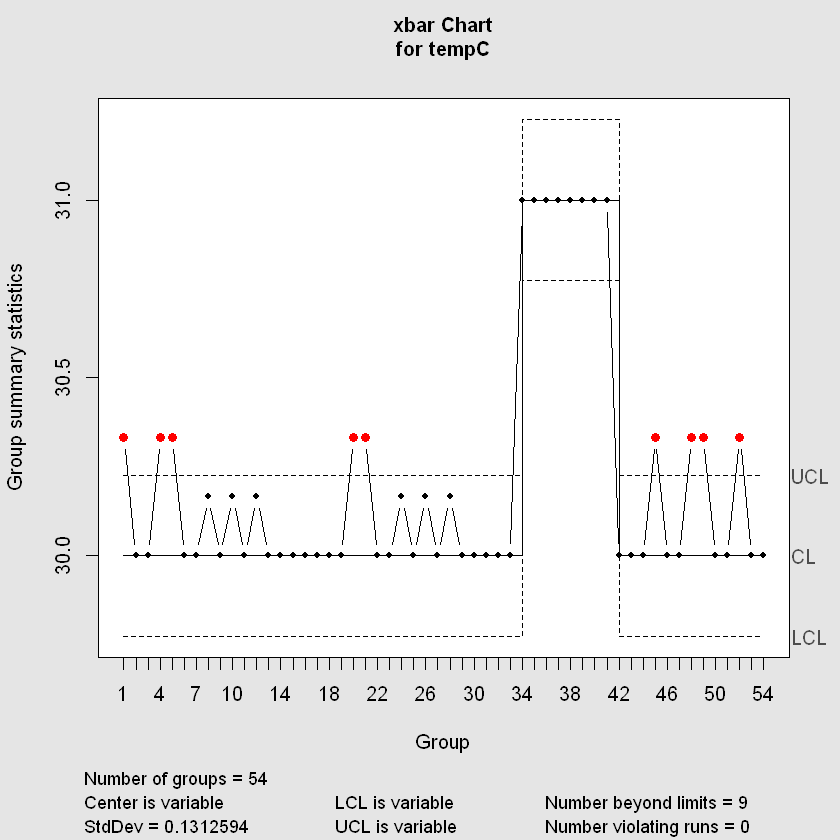

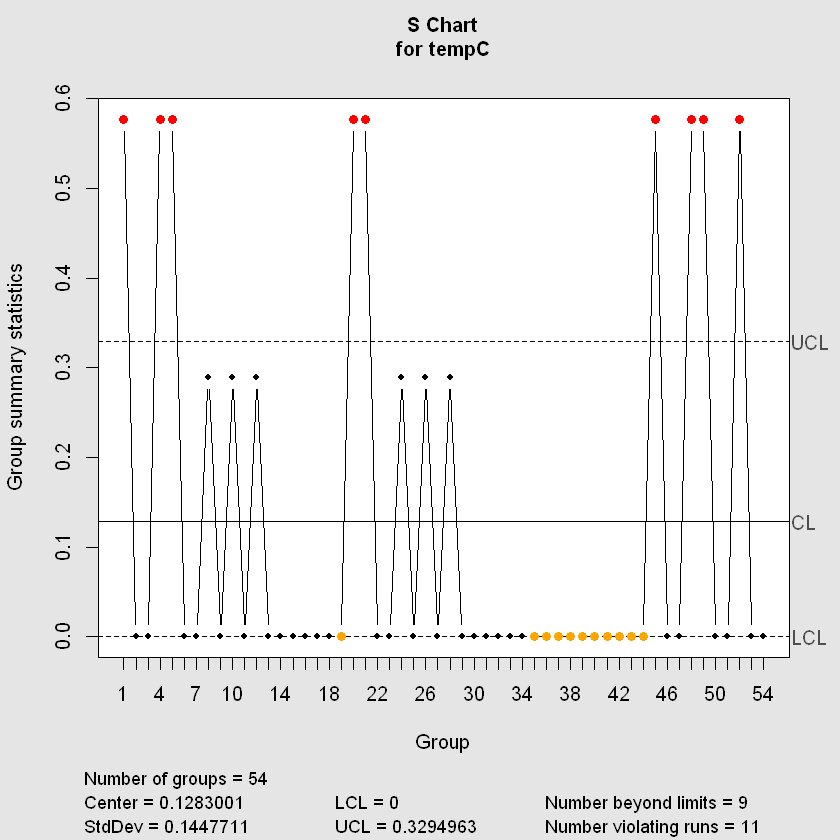

In [16]:
tempC <- temp_c # ou use diretamente os vetores

# Gráficos de x̄ e R
qcc_xbar <- qcc(tempC, type = "xbar")
qcc_range <- qcc(tempC, type = "R")

# Gráficos de x̃ (mediana) e s
qcc_median <- qcc(tempC, type = "xbar", center = apply(tempC, 1, median))
qcc_sd <- qcc(tempC, type = "S")

### Questões K, L

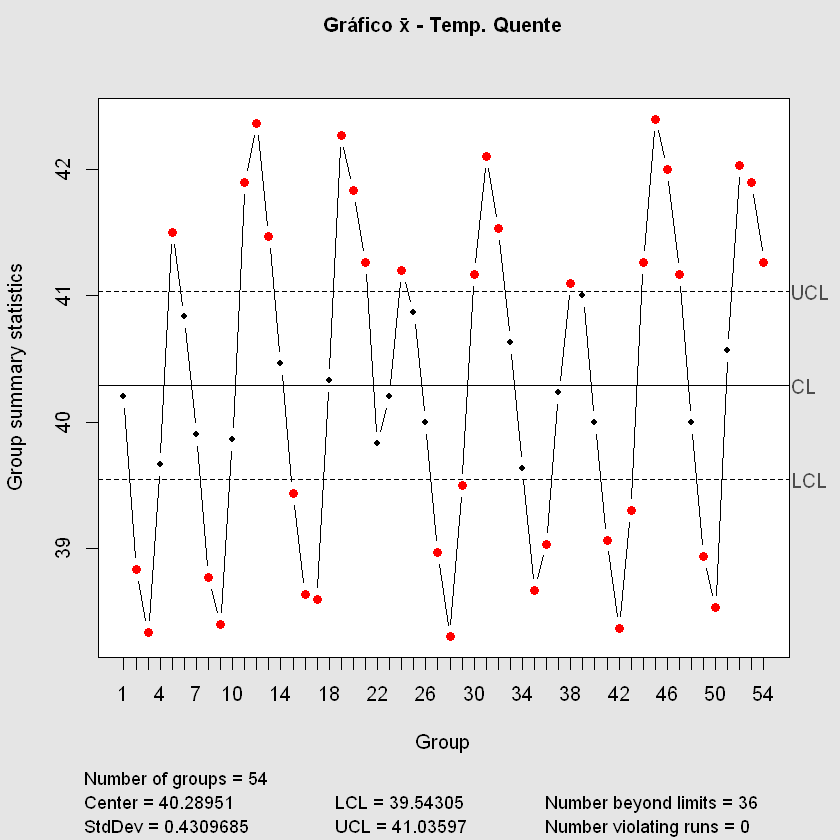

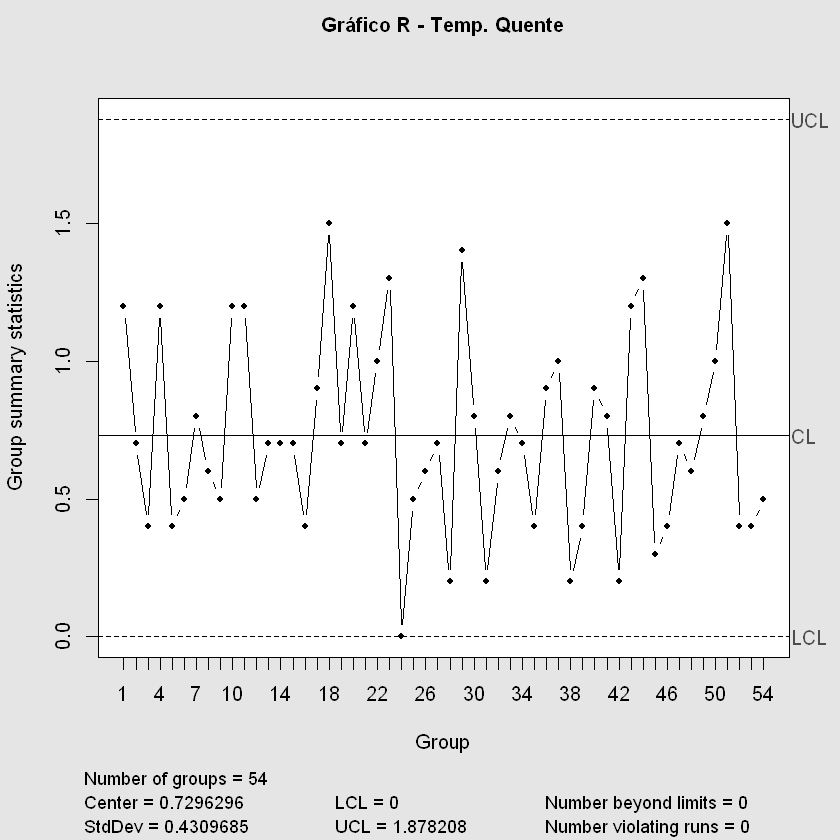

In [17]:
# Montar matriz dos dados
dados_xbar <- temp_quente

# Gráfico x̄
grafico_xbar <- qcc(dados_xbar, type = "xbar", title = "Gráfico x̄ - Temp. Quente")

# Gráfico R
grafico_R <- qcc(dados_xbar, type = "R", title = "Gráfico R - Temp. Quente")

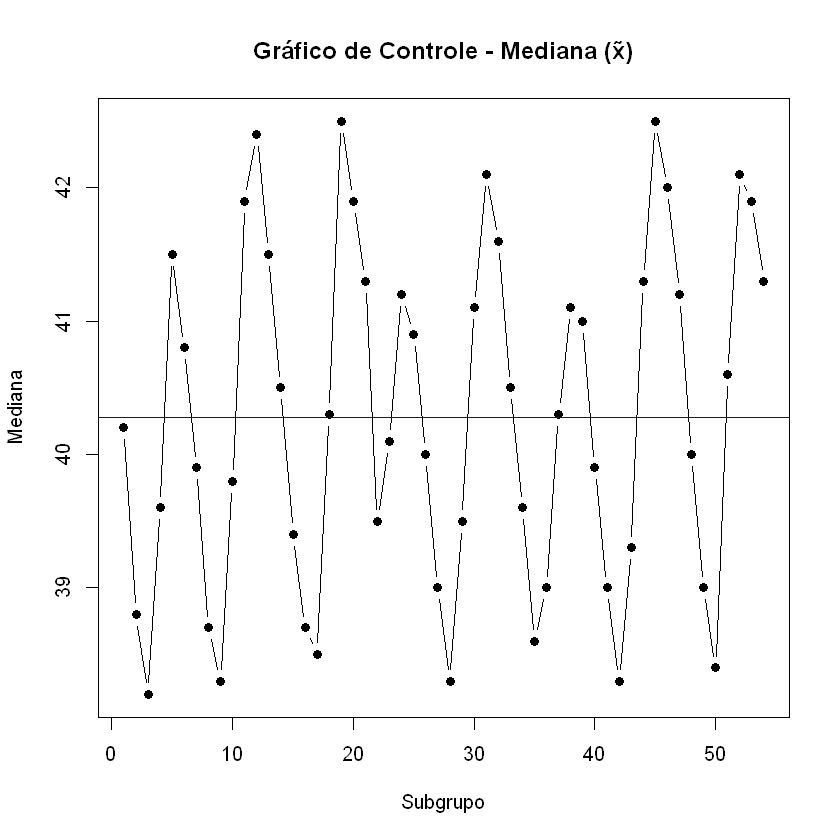

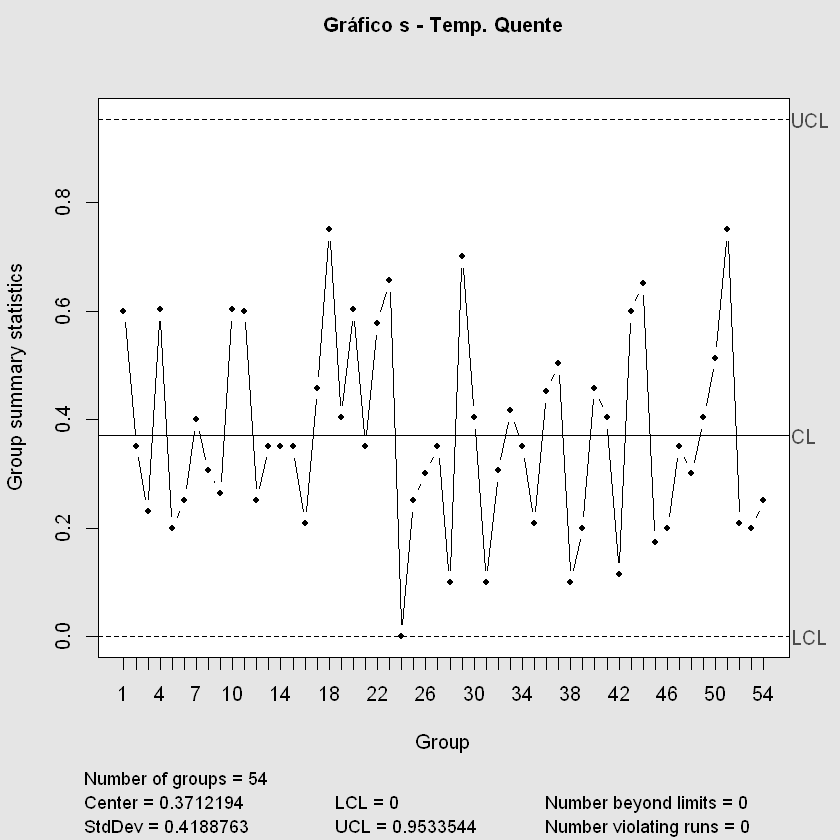

In [18]:
medianas <- apply(dados_xbar, 1, median)
desvios   <- apply(dados_xbar, 1, sd)

LC_med <- mean(medianas)
dp_med <- sd(medianas)

LIC_med <- LC_med - 3 * dp_med
LSC_med <- LC_med + 3 * dp_med

plot(medianas, type = "b", pch = 16,
     main = "Gráfico de Controle - Mediana (x̃)",
     ylab = "Mediana", xlab = "Subgrupo")
abline(h = c(LSC_med, LC_med, LIC_med), col = c("red", "blue", "red"), lty = c(2, 1, 2))

# Gráfico de controle do desvio padrão (s)
grafico_s <- qcc(dados_xbar, type = "S", title = "Gráfico s - Temp. Quente")